### NewHorizons
Try different seeds and train longer

In [1]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

# %load_ext autoreload
# %autoreload 2

from modules.expbuilder import default_params, run_exp

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

##### Run two demo runs

In [2]:
default_params

{'_expdesign_name': 'notnamed',
 '_condition_name': 'notnamed',
 '_train_name': 'rf-v1-crops',
 '_test_name': 'test-regulation-2-all',
 '_train_path': Path('../../../rf-chess-data/cropped_v1'),
 '_test_path': Path('../../../other-chess-data/regulation-test-2-all'),
 '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
 '_fit_one_cycle_epochs': 10,
 '_fine_tune_epochs': 15,
 '_train_seed': 0,
 '_valid_pct': 0.2,
 '_rm_norm': True,
 '_mult': 1.0,
 '_max_lighting': 0.9,
 '_max_warp': 0.4,
 '_max_rotate': 20.0,
 '_resize_method': 'pad',
 '_pad_mode': 'reflection',
 '_bs': 32,
 '_p_lighting': 0.75,
 '_custom_crop': None,
 '_custom_train_fnames': None,
 '_custom_train_fnames_args': {}}

In [2]:
seeds = [3,4,5]

grid_params = [
    {'_expdesign_name': 'new_horizons',
     '_condition_name': 'pad' if _custom_crop is None else 'crop',
     '_test_name': 'test-regulation-2-easy',
     '_test_path': test_path_easy,
     '_model_arch': resnet50,
      '_custom_crop': _custom_crop,
     '_fine_tune_epochs': 25,
     '_rm_norm': True,
     '_train_seed': seed,
    }  
    for _custom_crop in ('my-top-crop',None)
    for seed in seeds]

In [3]:
grid_params

[{'_expdesign_name': 'new_horizons',
  '_condition_name': 'crop',
  '_test_name': 'test-regulation-2-easy',
  '_test_path': Path('../../../other-chess-data/regulation-test-2-easy'),
  '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
  '_custom_crop': 'my-top-crop',
  '_fine_tune_epochs': 25,
  '_rm_norm': True,
  '_train_seed': 3},
 {'_expdesign_name': 'new_horizons',
  '_condition_name': 'crop',
  '_test_name': 'test-regulation-2-easy',
  '_test_path': Path('../../../other-chess-data/regulation-test-2-easy'),
  '_model_arch': <function torchvision.models.resnet.resnet50(pretrained=False, progress=True, **kwargs)>,
  '_custom_crop': 'my-top-crop',
  '_fine_tune_epochs': 25,
  '_rm_norm': True,
  '_train_seed': 4},
 {'_expdesign_name': 'new_horizons',
  '_condition_name': 'crop',
  '_test_name': 'test-regulation-2-easy',
  '_test_path': Path('../../../other-chess-data/regulation-test-2-easy'),
  '_model_arch': <function torchvision

In [4]:
for param in grid_params:
    
    run_params = default_params.copy()
    run_params.update(param)
    
    run_exp(run_params, 
            name_base='basicexp',
            b_msg=True, 
            b_cuda=True)

starting training...


saving to name_base: basicexp-60
Finished with:

{'valid_loss': 0.07905662059783936, 'accuracy': 0.9912891983985901}
{'test_loss': 0.2155417948961258, 'test_accuracy': 0.9197530746459961}


finished in 499.35 secs

starting training...


saving to name_base: basicexp-61
Finished with:

{'valid_loss': 0.07580095529556274, 'accuracy': 0.9895470142364502}
{'test_loss': 0.1304355412721634, 'test_accuracy': 0.9629629850387573}


finished in 502.92 secs

starting training...


saving to name_base: basicexp-62
Finished with:

{'valid_loss': 0.11896596103906631, 'accuracy': 0.9895470142364502}
{'test_loss': 0.1820327788591385, 'test_accuracy': 0.9320987462997437}


finished in 504.42 secs

starting training...


saving to name_base: basicexp-63
Finished with:

{'valid_loss': 0.08455890417098999, 'accuracy': 0.9912891983985901}
{'test_loss': 0.3264925479888916, 'test_accuracy': 0.9012345671653748}


finished in 507.3 secs

starting training...


saving to name_base: basicexp-64
Finished with:

{'valid_loss': 0.07988352328538895, 'accuracy': 0.9912891983985901}
{'test_loss': 0.3435076177120209, 'test_accuracy': 0.8888888955116272}


finished in 507.57 secs

starting training...


saving to name_base: basicexp-65
Finished with:

{'valid_loss': 0.10754705220460892, 'accuracy': 0.9895470142364502}
{'test_loss': 0.35021916031837463, 'test_accuracy': 0.8827160596847534}


finished in 507.73 secs



##### Plot results

In [2]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from pathlib import Path

from modules.evalutils import get_dir_nums, get_tbls, param_diffs
from modules.evalutils import conj_plot_data

In [3]:
nums = get_dir_nums(log_dir='../models/model-logs/')

In [4]:
ret = get_tbls('basicexp', nums, log_dir='../models/model-logs')

d_metrics, d_resid, d_params = ret

In [5]:
cmp_param = '_condition_name'

In [6]:
exps_all = d_params[d_params['_expdesign_name'] == 'new_horizons'].index

In [7]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_train_seed        3
_custom_crop       2
model_fn           6
_condition_name    2
dtype: int64

In [8]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [9]:
exp_metrics['exp_name'].unique()

array(['basicexp-60', 'basicexp-61', 'basicexp-62', 'basicexp-63',
       'basicexp-64', 'basicexp-65'], dtype=object)

In [10]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [11]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

In [12]:
def foo(x): 
    if pd.isna(x):return 'blue'
    else: return x

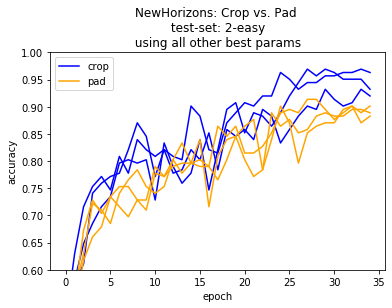

In [13]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('NewHorizons: Crop vs. Pad \n test-set: 2-easy \n using all other best params ')
plt.ylabel('accuracy')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.6, 1.0]);

In [14]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param
                            ,values='test_loss')

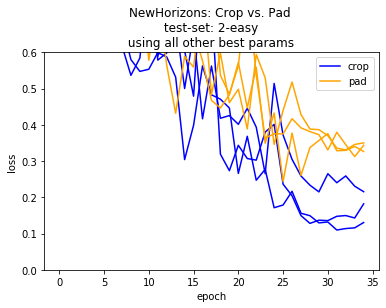

In [16]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('NewHorizons: Crop vs. Pad \n test-set: 2-easy \n using all other best params ')
plt.ylabel('loss')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([0.0, 0.6]);